<a href="https://colab.research.google.com/github/imdebarun/tensorflow2/blob/main/Neural_Network_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import requied libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Non numerical features need to be converted to numbers using numerical encoding like One-Hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [10]:
# Build a neural network (sort of like model_2 previously)
tf.random.set_seed(42)

# 1. Create a model.
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model.
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8548.0469 - mae: 8548.0469
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7885.9487 - mae: 7885.9487
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7610.4897 - mae: 7610.4897
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.5347 - mae: 7693.5347
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7674.7451 - mae: 7674.7451
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7605.4189 - mae: 7605.4189
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7575.1279 - mae: 7575.1279
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7706.2578 - mae: 7706.2578
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7624.3101 - mae: 7624.3101
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7668.7754 - mae: 7668.7754

In [11]:
# Check the results of insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7274.9277 - mae: 7274.9277


[7274.927734375, 7274.927734375]

In [12]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Improving Model -
To try improve our model, lets run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a mdoel.
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4954.3555 - mae: 4954.3555


[4954.35546875, 4954.35546875]

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13278.8457 - mae: 13278.8457
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13071.4854 - mae: 13071.4854
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12652.6865 - mae: 12652.6865
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11859.9248 - mae: 11859.9248
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10596.1064 - mae: 10596.1064
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9099.7734 - mae: 9099.7734
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7885.2422 - mae: 7885.2422
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7462.7310 - mae: 7462.7310
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7408.2231 - mae: 7408.2231
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7388.3638 - mae:

In [18]:
# Evaluate our 3rd Model:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3478.5591 - mae: 3478.5591


[3478.55908203125, 3478.55908203125]

Text(0.5, 0, 'epochs')

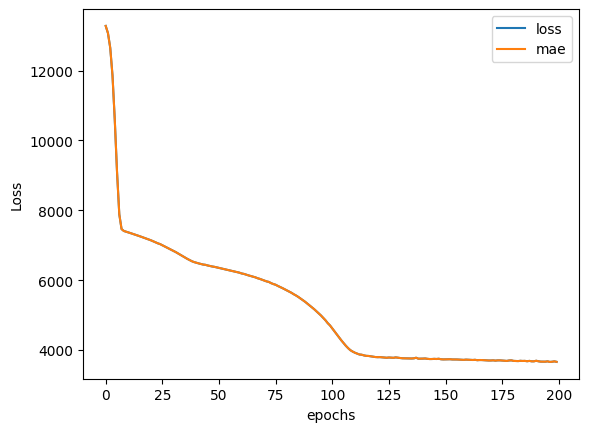

In [19]:
# Plot history (also know as the loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")